### 1.	Describe the structure of an artificial neuron. How is it similar to a biological neuron? What are its main components?


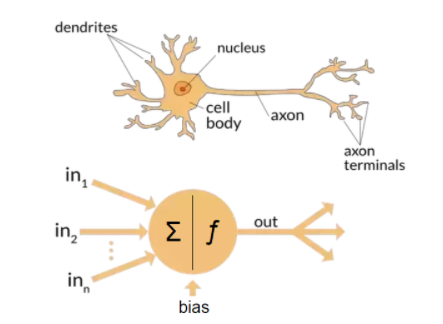

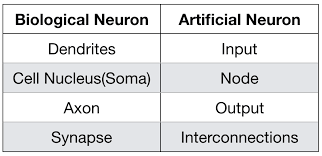

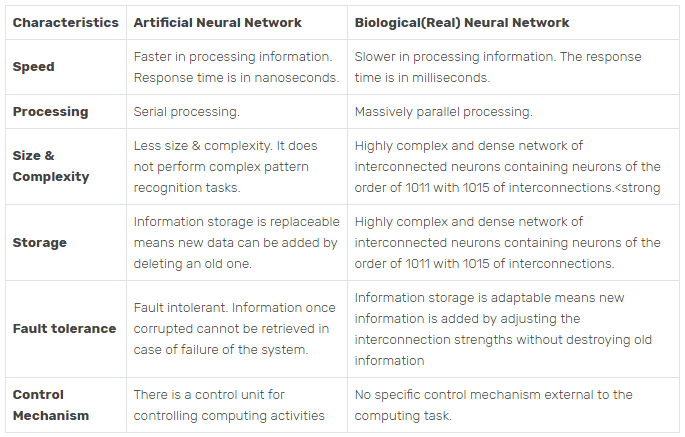

### 2.	What are the different types of activation functions popularly used? Explain each of them.



### **1.   Sigmod function**



The function formula and chart are as follows

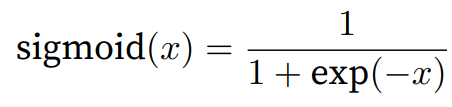


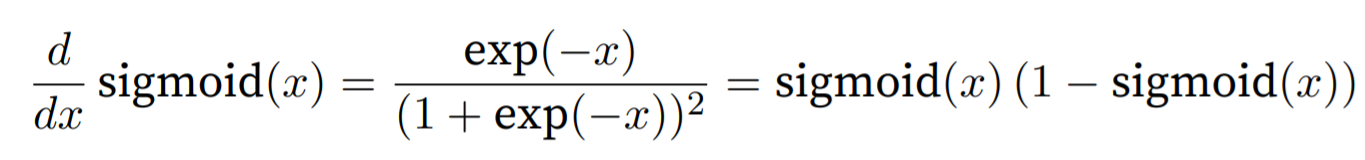

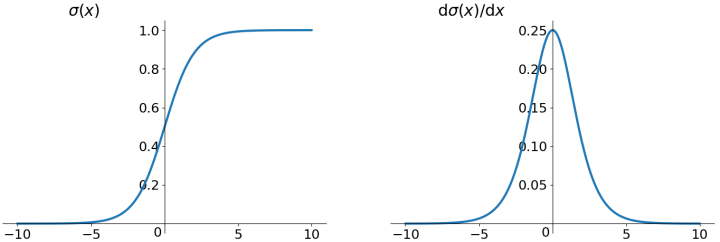

The Sigmoid function is the most frequently used activation function in the beginning of deep learning. It is a smoothing function that is easy to derive.

In the sigmoid function, we can see that its output is in the open interval (0,1). We can think of probability, but in the strict sense, don't treat it as probability. The sigmoid function was once more popular. It can be thought of as the firing rate of a neuron. In the middle where the slope is relatively large, it is the sensitive area of the neuron. On the sides where the slope is very gentle, it is the neuron's inhibitory area.

The function itself has certain defects.

1) When the input is slightly away from the coordinate origin, the gradient of the function becomes very small, almost zero. In the process of neural network backpropagation, we all use the chain rule of differential to calculate the differential of each weight w. When the backpropagation passes through the sigmod function, the differential on this chain is very small. Moreover, it may pass through many sigmod functions, which will eventually cause the weight w to have little effect on the loss function, which is not conducive to the optimization of the weight. This The problem is called gradient saturation or gradient dispersion.

2) The function output is not centered on 0, which will reduce the efficiency of weight update.

3) The sigmod function performs exponential operations, which is slower for computers.


Advantages of Sigmoid Function : -

1. Smooth gradient, preventing “jumps” in output values.
2. Output values bound between 0 and 1, normalizing the output of each neuron.
3. Clear predictions, i.e very close to 1 or 0.


Sigmoid has three major disadvantages:
* Prone to gradient vanishing
* Function output is not zero-centered
* Power operations are relatively time consuming


# **2.  tanh function**

The tanh function formula and curve are as follows

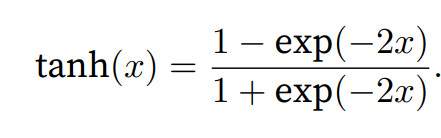

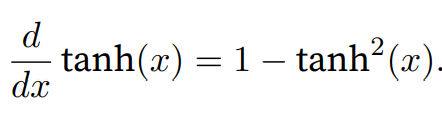

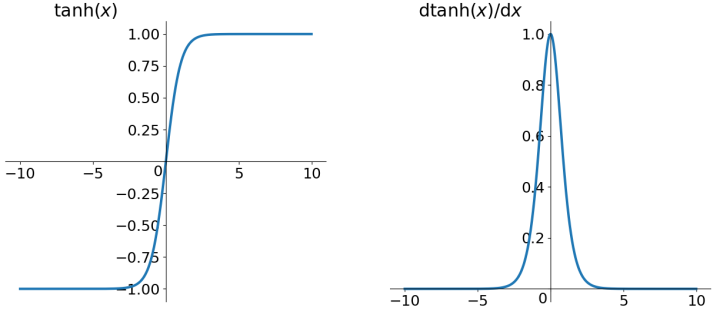

Tanh is a hyperbolic tangent function. The curves of tanh function and sigmod function are relatively similar. Let ’s compare them. First of all, when the input is large or small, the output is almost smooth and the gradient is small, which is not conducive to weight update. The difference is the output interval. 

The output interval of tanh is 1), and the whole function is 0-centric, which is better than sigmod.

In general binary classification problems, the tanh function is used for the hidden layer and the sigmod function is used for the output layer. However, these are not static, and the specific activation function to be used must be analyzed according to the specific problem, or it depends on debugging.

Advantages of tanh Function : -

1. Smooth gradient, preventing “jumps” in output values.
2. Output values bound between -1 and 1, normalizing the output of each neuron.
3. Clear predictions, i.e very close to 1 or -1.
4. zero-centered function


tanh has two major disadvantages:
* Prone to gradient vanishing
* Power operations are relatively time consuming

# 3.  ReLU function
#### Rectified Linear Unit Function

ReLU function formula and curve are as follows
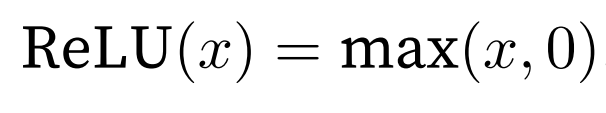

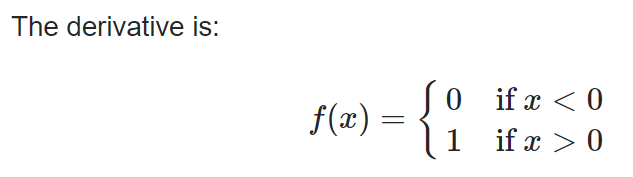

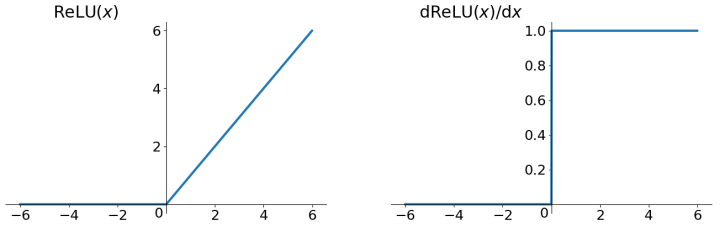

The ReLU function is actually a function that takes the maximum value. Note that this is not fully interval-derivable, but we can take sub-gradient, as shown in the figure above. Although ReLU is simple, it is an important achievement in recent years.

The ReLU (Rectified Linear Unit) function is an activation function that is currently more popular. Compared with the sigmod function and the tanh function, it has the following advantages:

1) When the input is positive, there is no gradient saturation problem.

2) The calculation speed is much faster. The ReLU function has only a linear relationship. Whether it is forward or backward, it is much faster than sigmod and tanh. (Sigmod and tanh need to calculate the exponent, which will be slower.)

Ofcourse, there are disadvantages:

1) When the input is negative, ReLU is completely inactive, which means that once a negative number is entered, ReLU will die. In this way, in the forward propagation process, it is not a problem. Some areas are sensitive and some are insensitive. But in the backpropagation process, if you enter a negative number, the gradient will be completely zero, which has the same problem as the sigmod function and tanh function.

2) We find that the output of the ReLU function is either 0 or a positive number, which means that the ReLU function is not a 0-centric function.

# 4. Leaky ReLU function




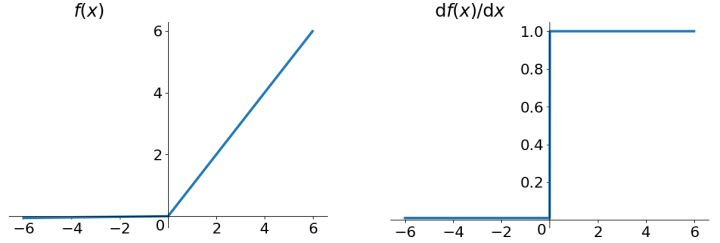

In order to solve the Dead ReLU Problem, people proposed to set the first half of ReLU 0.01x instead of 0. Another intuitive idea is a parameter-based method, Parametric ReLU : f(x)= max(alpha x,x), which alpha can be learned from back propagation. In theory, Leaky ReLU has all the advantages of ReLU, plus there will be no problems with Dead ReLU, but in actual operation, it has not been fully proved that Leaky ReLU is always better than ReLU.

## Comparision of ReLu and Leaky Relu
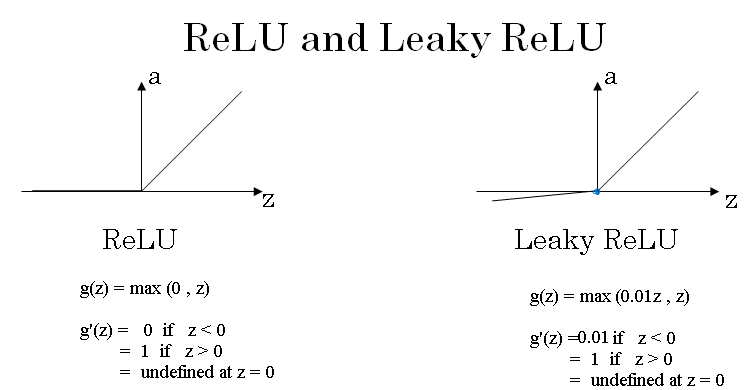

# 5. ELU (Exponential Linear Units) function


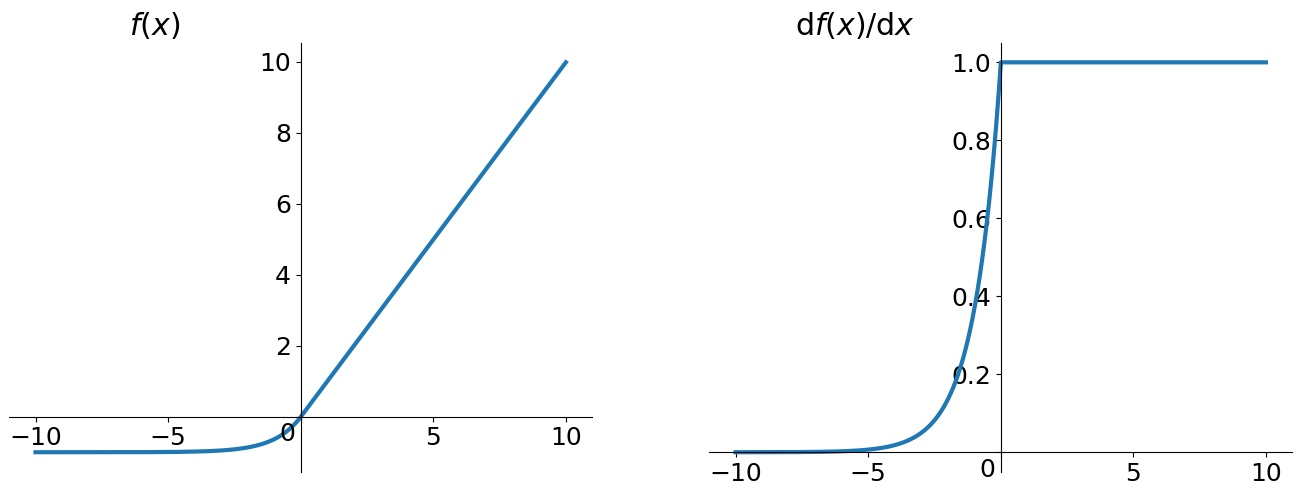

ELU is also proposed to solve the problems of ReLU. Obviously, ELU has all the advantages of ReLU, and:

* No Dead gradient issues for negative values like ReLU 
* The mean of the output is close to 0, zero-centered

One small problem is that it is slightly more computationally intensive. Similar to Leaky ReLU, although theoretically better than ReLU, there is currently no good evidence in practice that ELU is always better than ReLU.

# 6.  Softmax

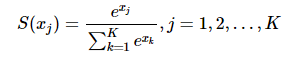
for an arbitrary real vector of length K, Softmax can compress it into a real vector of length K with a value in the range (0, 1), and the sum of the elements in the vector is 1. 

It also has many applications in Multiclass Classification and neural networks. Softmax is different from the normal max function: the max function only outputs the largest value, and Softmax ensures that smaller values have a smaller probability and will not be discarded directly. It is a "max" that is "soft".

The denominator of the Softmax function combines all factors of the original output value, which means that the different probabilities obtained by the Softmax function are related to each other.
In the case of binary classification, for Sigmoid, there are:


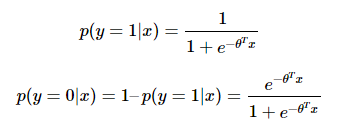

For Softmax with K = 2, there are:

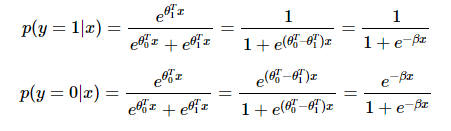
Among them: It

# 7.  PRelu (Parametric ReLU)

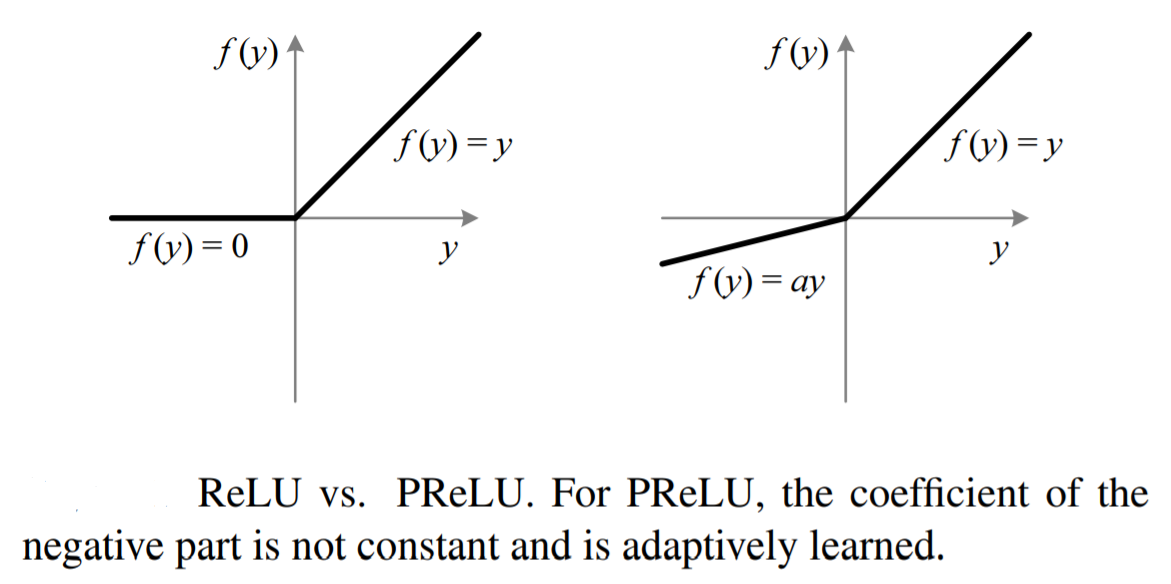
PReLU is also an improved version of ReLU. In the negative region, PReLU has a small slope, which can also avoid the problem of ReLU death. Compared to ELU, PReLU is a linear operation in the negative region. Although the slope is small, it does not tend to 0, which is a certain advantage.




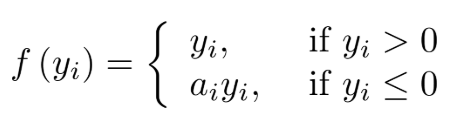
We look at the formula of PReLU. The parameter α is generally a number between 0 and 1, and it is generally relatively small, such as a few zeros. When α = 0.01, we call PReLU as Leaky Relu , it is regarded as a special case PReLU it.

Above, yᵢ is any input on the ith channel and aᵢ is the negative slope which is a learnable parameter.
* if aᵢ=0, f becomes ReLU
* if aᵢ>0, f becomes leaky ReLU
* if aᵢ is a learnable parameter, f becomes PReLU

# 8. Swish (A Self-Gated) Function
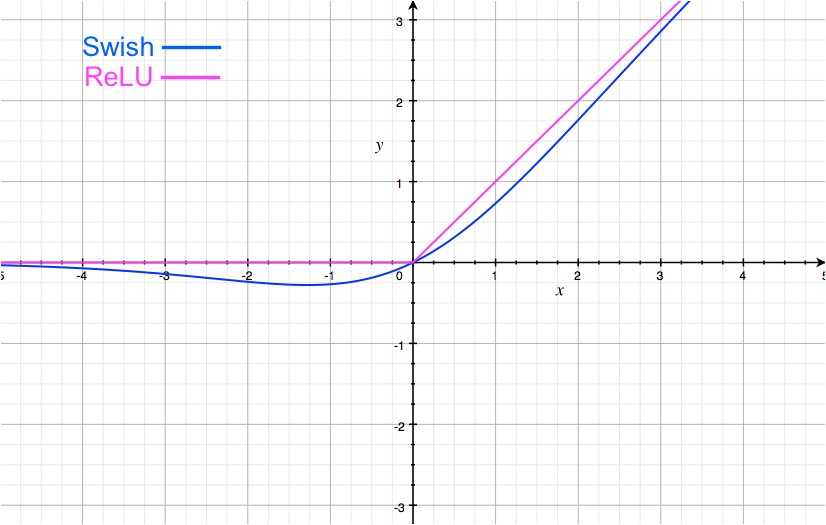



The formula is: **y = x * sigmoid (x)**

Swish's design was inspired by the use of sigmoid functions for gating in LSTMs and highway networks. We use the same value for gating to simplify the gating mechanism, which is called **self-gating**. 

The advantage of self-gating is that it only requires a simple scalar input, while normal gating requires multiple scalar inputs. This feature enables self-gated activation functions such as Swish to easily replace activation functions that take a single scalar as input (such as ReLU) without changing the hidden capacity or number of parameters.

1) Unboundedness (unboundedness) is helpful to prevent gradient from gradually approaching 0 during slow training, causing saturation. At the same time, being bounded has advantages, because bounded active functions can have strong reguairzation, and larger negative inputs will be resolved.

2) At the same time, smoothness also plays an important role in optimization and generalization.



### 9.  Maxout

The Maxout activation function is defined as follows
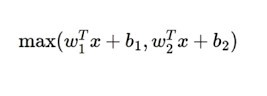


One relatively popular choice is the Maxout neuron (introduced recently by Goodfellow et al.) that generalizes the ReLU and its leaky version. Notice that both ReLU and Leaky ReLU are a special case of this form (for example, for ReLU we have w1,b1 =0).The Maxout neuron therefore enjoys all the benefits of a ReLU unit (linear regime of operation, no saturation) and does not have its drawbacks

The Maxout activation is a generalization of the ReLU and the leaky ReLU functions. It is a learnable activation function.

Maxout can be seen as adding a layer of activation function to the deep learning network, which contains a parameter k. Compared with ReLU, sigmoid, etc., this layer is special in that it adds k neurons and then outputs the largest activation value. value.


### 10.  Softplus

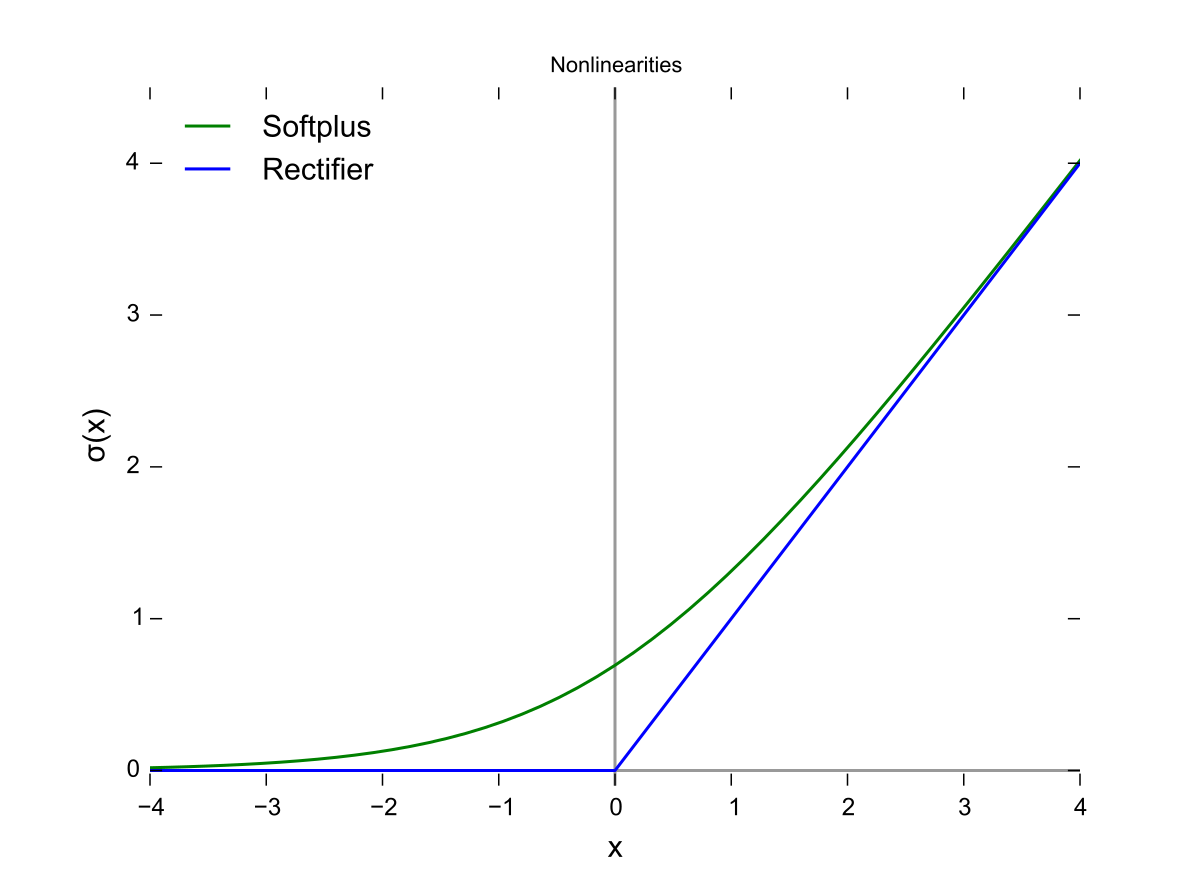

The softplus function is similar to the ReLU function, but it is relatively smooth.It is unilateral suppression like ReLU.It has a wide acceptance range (0, + inf).

Softplus function: **f(x) = ln(1+exp x)**



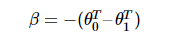

can be seen that in the case of binary classification, Softmax is degraded to Sigmoid.

### 3.	
### a.	Explain, in details, Rosenblatt’s perceptron model. How can a set of data be classified using a simple perceptron?
### b.	Use a simple perceptron with weights w0, w1, and w2 as −1, 2, and 1, respectively, to classify data points (3, 4); (5, 2); (1, −3); (−8, −3); (−3, 0).


### a . Perceptron Learning Rule or Rosenblatt’s perceptron model.
>Rosenblatt introduced the  Perceptron Learning Rule in 1958. It is a supervised learning rule. In this rule, the learning signal is taken as $r = d_i - y$ , and the transfer function is f(x) = sgn(x).

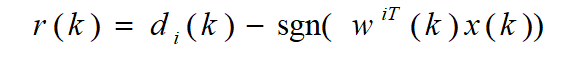

Thus, the weight update rule is 

 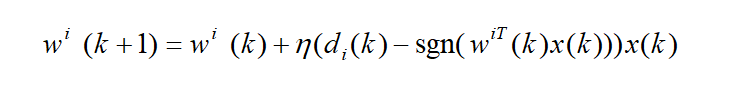

where, $\eta$  is the learning rate. It is a discrete rule and it convergence follows from the perceptron convergence theorem.


### b .
> Weights :

>w0 = -1 , w1 = 2 and w2 = 1

> Data points

> x1 = (3, 4); x2 = (5, 2); x3 = (1, −3); x4 = (−8, −3); x5 =(−3, 0).

> $y_i = w_o + ( w_1 , w_2 )^T * (xi1 , xi2)$

> for $x_1= (3, 4) ; y_1 = sgn( -1 + 2*3 + 1*4 ) = sgn( 9 ) = 1 $

> for $x_2 = (5, 2) ; y_2 = sgn( -1 + 2*5 + 1*2 ) = sgn( 11 ) = 1 $

> for $x_3 = (1, −3) ; y_3 = sgn( -1 + 2*1 + 1*-3 ) = sgn( -2 ) = -1 $

> for $x_4 = (-8, −3) ; y_4 = sgn( -1 + 2*-8 + 1*-3 ) = sgn( -20 ) = -1 $

> for $x_5 = (-3, 0) ; y_5 = sgn( -1 + 2*-3 + 1*0 ) = sgn( -7 ) = -1 $

##### Conclusion :
> $x_1 = (3, 4); x_2 = (5, 2)$ belongs to Class : 1

>$x_3 = (1, −3); x_4 = (−8, −3); x_5= (−3, 0)$ belongs to Class : -1


### 4.	Explain the basic structure of a multi-layer perceptron. Explain how it can solve the XOR problem.


### Multi Layer Perceptron :

>Multi layer perceptron (MLP) is a supplement of feed forward neural network. It consists of three types of layers—the input layer, output layer and hidden layer, as shown . The input layer receives the input signal to be processed. The required task such as prediction and classification is performed by the output layer. An arbitrary number of hidden layers that are placed in between the input and output layer are the true computational engine of the MLP. Similar to a feed forward network in a MLP the data flows in the forward direction from input to output layer. The neurons in the MLP are trained with the back propagation learning algorithm. MLPs are designed to approximate any continuous function and can solve problems which are not linearly separable. The major use cases of MLP are pattern classification, recognition, prediction and approximation.

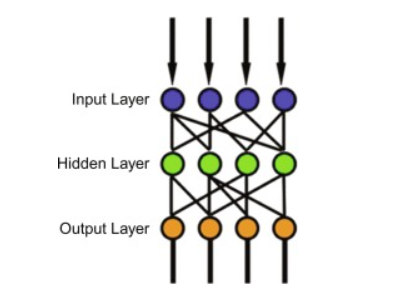

### Solving XOR problem using MLP:
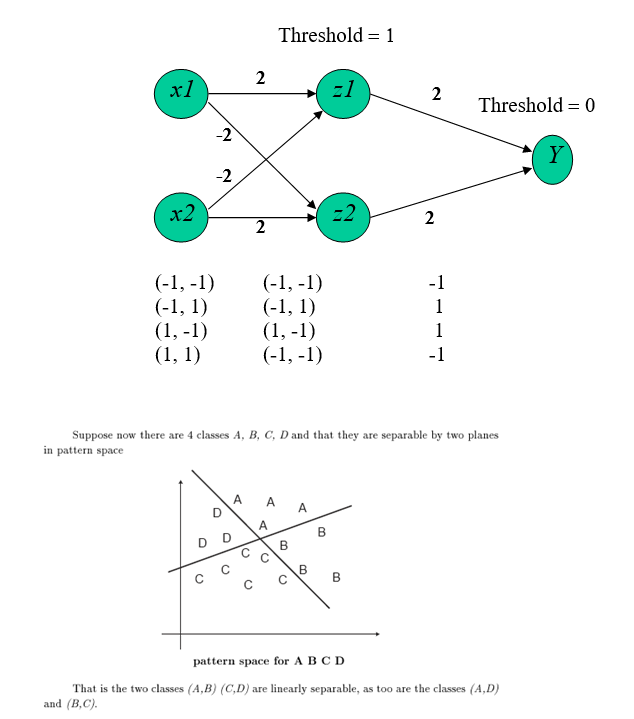

### 5.	What is artificial neural network (ANN)? Explain some of the salient highlights in the different architectural options for ANN.


An artificial Neural Network (ANN) is a massively parallel distributed processor
made up of highly networked  simple processing units (called neurons)  which has natural ability for 

>	storing experimental knowledge and 

>	making it available for future use. 

It resembles the brain in two things:

>a)	Knowledge is acquired by the   network from its environment through a learning process.

>b)	Inter-neuron connection strengths (known as synaptic weights) are  used to store the acquired knowledge. 

Key Feature of ANN – its Structure  

>•	The key element of this paradigm is the novel structure of the information processing system.

>•	It is composed of a large number of highly interconnected processing elements (neurons) working in unison to solve specific problems. 


### 6.	Explain the learning process of an ANN. Explain, with example, the challenge in assigning synaptic weights for the interconnection between neurons? How can this challenge be addressed?


>Learning in biological systems involves adjustments to the synaptic connections that exist between the neurons. This is true of ANNs  as well.   ANNs, like people, learn by example. 


#### A Simple Artificial Neuron :
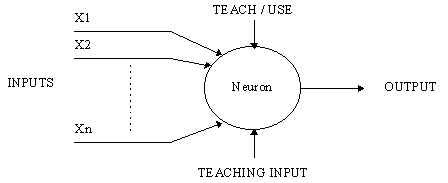
An artificial neuron is a device with  
>	many inputs and 
>	one output. 

The neuron has two modes of operation;  
>	the training mode and 
>	the using mode.
 
In the training mode, the neuron can be trained to fire (or not), for particular input patterns.
 
 In the using mode, when a taught input pattern is detected at the input, its associated output becomes the current output. 
If the input pattern does not belong in the taught list of input patterns, the firing rule is used to determine whether to fire or not.


#### 	A Little More General  Neuron:
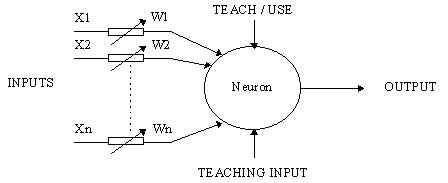
>	A more sophisticated neuron  is the McCulloch and Pitts model (MCP). The difference from the previous model is that the inputs are 'weighted',

>These weighted inputs are then added together and if they exceed a pre-set threshold value, the neuron fires. In any other case the neuron does not fire. 
In mathematical terms, the neuron fires if and only if   
$X_1W_1 + X_2W_2 + X_3W_3 + ... X_nW_n  > T$ 

>The addition of input weights and of the threshold makes this neuron a very flexible and powerful one. 

>The MCP neuron has the ability to adapt to a particular situation by changing its weights and/or threshold. 


### 7.	Explain, in details, the backpropagation algorithm. What are the limitations of this algorithm?



### Back Propogation :

In the following derivation, we'll use the following notation:

$L$ - Number of layers in the network.

$N^n$ - Dimensionality of layer $n \in \{0, \ldots, L\}$.  $N^0$ is the dimensionality of the input; $N^L$ is the dimensionality of the output.

$W^m \in \mathbb{R}^{N^m \times N^{m - 1}}$ - Weight matrix for layer $m \in \{1, \ldots, L\}$.  $W^m_{ij}$ is the weight between the $i^{th}$ unit in layer $m$ and the $j^{th}$ unit in layer $m - 1$.

$b^m \in \mathbb{R}^{N^m}$ - Bias vector for layer $m$.

$\sigma^m$ - Nonlinear activation function of the units in layer $m$, applied elementwise.

$z^m \in \mathbb{R}^{N^m}$ - Linear mix of the inputs to layer $m$, computed by $z^m = W^m a^{m - 1} + b^m$.

$a^m \in \mathbb{R}^{N^m}$ - Activation of units in layer $m$, computed by $a^m = \sigma^m(h^m) = \sigma^m(W^m a^{m - 1} + b^m)$.  $a^L$ is the output of the network.  We define the special case $a^0$ as the input of the network.

$y \in \mathbb{R}^{N^L}$ - Target output of the network.

$C$ - Cost/error function of the network, which is a function of $a^L$ (the network output) and $y$ (treated as a constant).



In order to train the network using a gradient descent algorithm, we need to know the gradient of each of the parameters with respect to the cost/error function $C$; that is, we need to know $\frac{\partial C}{\partial W^m}$ and $\frac{\partial C}{\partial b^m}$.  It will be sufficient to derive an expression for these gradients in terms of the following terms, which we can compute based on the neural network's architecture:

- $\frac{\partial C}{\partial a^L}$: The derivative of the cost function with respect to its argument, the output of the network
- $\frac{\partial a^m}{\partial z^m}$: The derivative of the nonlinearity used in layer $m$ with respect to its argument

To compute the gradient of our cost/error function $C$ to $W^m_{ij}$ (a single entry in the weight matrix of the layer $m$), we can first note that $C$ is a function of $a^L$, which is itself a function of the linear mix variables $z^m_k$, which are themselves functions of the weight matrices $W^m$ and biases $b^m$.  With this in mind, we can use the chain rule as follows:

$$\frac{\partial C}{\partial W^m_{ij}} = \sum_{k = 1}^{N^m} \frac{\partial C}{\partial z^m_k} \frac{\partial z^m_k}{\partial W^m_{ij}}$$

Note that by definition 
$$
z^m_k = \sum_{l = 1}^{N^m} W^m_{kl} a_l^{m - 1} + b^m_k
$$
It follows that $\frac{\partial z^m_k}{\partial W^m_{ij}}$ will evaluate to zero when $i \ne k$ because $z^m_k$ does not interact with any elements in $W^m$ except for those in the $k$<sup>th</sup> row, and we are only considering the entry $W^m_{ij}$.  When $i = k$, we have

\begin{align*}
\frac{\partial z^m_i}{\partial W^m_{ij}} &= \frac{\partial}{\partial W^m_{ij}}\left(\sum_{l = 1}^{N^m} W^m_{il} a_l^{m - 1} + b^m_i\right)\\
&= a^{m - 1}_j\\
\rightarrow \frac{\partial z^m_k}{\partial W^m_{ij}} &= \begin{cases}
0 & k \ne i\\
a^{m - 1}_j & k = i
\end{cases}
\end{align*}

The fact that $\frac{\partial C}{\partial a^m_k}$ is $0$ unless $k = i$ causes the summation above to collapse, giving

$$\frac{\partial C}{\partial W^m_{ij}} = \frac{\partial C}{\partial z^m_i} a^{m - 1}_j$$

or in vector form

$$\frac{\partial C}{\partial W^m} = \frac{\partial C}{\partial z^m} a^{m - 1 \top}$$

Similarly for the bias variables $b^m$, we have

$$\frac{\partial C}{\partial b^m_i} = \sum_{k = 1}^{N^m} \frac{\partial C}{\partial z^m_k} \frac{\partial z^m_k}{\partial b^m_i}$$

As above, it follows that $\frac{\partial z^m_k}{\partial b^m_i}$ will evaluate to zero when $i \ne k$ because $z^m_k$ does not interact with any element in $b^m$ except $b^m_k$.  When $i = k$, we have

\begin{align*}
\frac{\partial z^m_i}{\partial b^m_i} &= \frac{\partial}{\partial b^m_i}\left(\sum_{l = 1}^{N^m} W^m_{il} a_l^{m - 1} + b^m_i\right)\\
&= 1\\
\rightarrow \frac{\partial z^m_i}{\partial b^m_i} &= \begin{cases}
0 & k \ne i\\
1 & k = i
\end{cases}
\end{align*}

The summation also collapses to give

$$\frac{\partial C}{\partial b^m_i} = \frac{\partial C}{\partial z^m_i}$$

or in vector form

$$\frac{\partial C}{\partial b^m} = \frac{\partial C}{\partial z^m}$$

Now, we must compute $\frac{\partial C}{\partial z^m_k}$.  For the final layer ($m = L$), this term is straightforward to compute using the chain rule:

$$
\frac{\partial C}{\partial z^L_k} = \frac{\partial C}{\partial a^L_k} \frac{\partial a^L_k}{\partial z^L_k}
$$

or, in vector form

$$
\frac{\partial C}{\partial z^L} = \frac{\partial C}{\partial a^L} \frac{\partial a^L}{\partial z^L}
$$

The first term $\frac{\partial C}{\partial a^L}$ is just the derivative of the cost function with respect to its argument, whose form depends on the cost function chosen.  Similarly, $\frac{\partial a^m}{\partial z^m}$ (for any layer $m$ includling $L$) is the derivative of the layer's nonlinearity with respect to its argument and will depend on the choice of nonlinearity.  For other layers, we again invoke the chain rule:


\begin{align*}
\frac{\partial C}{\partial z^m_k} &= \frac{\partial C}{\partial a^m_k} \frac{\partial a^m_k}{\partial z^m_k}\\
&= \left(\sum_{l = 1}^{N^{m + 1}}\frac{\partial C}{\partial z^{m + 1}_l}\frac{\partial z^{m + 1}_l}{\partial a^m_k}\right)\frac{\partial a^m_k}{\partial z^m_k}\\
&= \left(\sum_{l = 1}^{N^{m + 1}}\frac{\partial C}{\partial z^{m + 1}_l}\frac{\partial}{\partial a^m_k} \left(\sum_{h = 1}^{N^m} W^{m + 1}_{lh} a_h^m + b_l^{m + 1}\right)\right) \frac{\partial a^m_k}{\partial z^m_k}\\
&= \left(\sum_{l = 1}^{N^{m + 1}}\frac{\partial C}{\partial z^{m + 1}_l} W^{m + 1}_{lk}\right) \frac{\partial a^m_k}{\partial z^m_k}\\
&= \left(\sum_{l = 1}^{N^{m + 1}}W^{m + 1\top}_{kl} \frac{\partial C}{\partial z^{m + 1}_l}\right) \frac{\partial a^m_k}{\partial z^m_k}\\
\end{align*}

where the last simplification was made because by convention $\frac{\partial C}{\partial z^{m + 1}_l}$ is a column vector, allowing us to write the following vector form:

$$\frac{\partial C}{\partial z^m} = \left(W^{m + 1\top} \frac{\partial C}{\partial z^{m + 1}}\right) \circ \frac{\partial a^m}{\partial z^m}$$

Note that we now have the ingredients to efficiently compute the gradient of the cost function with respect to the network's parameters:  First, we compute $\frac{\partial C}{\partial z^L_k}$ based on the choice of cost function and nonlinearity.  Then, we recursively can compute $\frac{\partial C}{\partial z^m}$ layer-by-layer based on the term $\frac{\partial C}{\partial z^{m + 1}}$ computed from the previous layer and the nonlinearity of the layer (this is called the "backward pass").

#### Limitations of using Backpropagation

>The actual performance of backpropagation on a specific problem is dependent on the input data.

>Backpropagation can be quite sensitive to noisy data

>We need to use the matrix-based approach for backpropagation instead of mini-batch.

### 8.	Describe, in details, the process of adjusting the interconnection weights in a multi-layer neural network.


The MLP learning procedure is as follows :

>Starting with the input layer, propagate data forward to the output layer. This step is the forward propagation.

>Based on the output, calculate the error (the difference between the predicted and known outcome). The error needs to be minimized.

>Backpropagate the error. Find its derivative with respect to each weight in the network, and update the model.

Repeat the three steps given above over multiple epochs to learn ideal weights.

Finally, the output is taken via a threshold function to obtain the predicted class labels.

#### Forward Propagation in MLP
In the first step, calculate the 
> Pre-activation

>activation unit al(h) of the hidden layer.
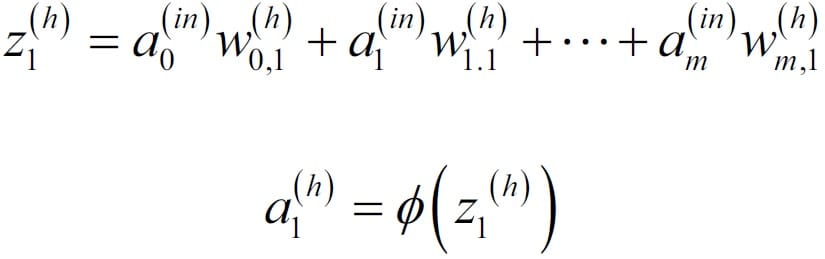



Therefore the formula for calculating training error for a neural network can be represented as follows:

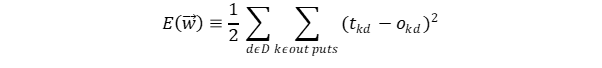

>outputs is the set of output units in network

>d is the data point

>t and o are target values and the output values produced by the network for the kth output unit for data point ‘d’.

#### Updation of weights in Back Propagation
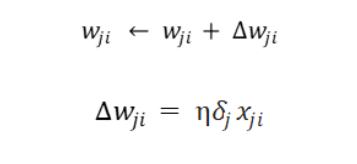
>weight vector from jth node to ith node is updated using above formula in which $\eta$ is the learning rate, ‘𝛿’ is the training error and ‘x’ is the input vector for the given node.

### Termination Criterion for Multi layer networks
The above algorithm is continuously implemented on all data points until we specify a termination criterion, which can be implemented in either of these three ways:

>training the network for a fixed number of epochs ( iterations ).

>setting the threshold to an error, if the error goes below the given threshold, we can stop training the neural network further.

>Creating a validation sample of data, after every iteration we validate our model with this data and the iteration with the highest accuracy can be considered as the final model.

The first way of termination might not yield us better results , the most recommended way is the third way as we are aware of the accuracy of our model so far.

### 9.	What are the steps in the backpropagation algorithm? Why a multi-layer neural network is required?


#### The steps in the backpropagation algorithm :

>Starting with the input layer, propagate data forward to the output layer. This step is the forward propagation.

>Based on the output, calculate the error (the difference between the predicted and known outcome). The error needs to be minimized.

>Backpropagate the error. Find its derivative with respect to each weight in the network, and update the model.

Repeat the three steps given above over multiple epochs to learn ideal weights.

Finally, the output is taken via a threshold function to obtain the predicted class labels.

#### Need of multi-layer neural network
Multilayer networks solve the classification problem for non linear sets by employing hidden layers, whose neurons are not directly connected to the output. The additional hidden layers can be interpreted geometrically as additional hyper-planes, which enhance the separation capacity of the network.

### 10.	Write short notes on:
>1.	Artificial neuron

>2.	Multi-layer perceptron

>3.	Deep learning

>4.	Learning rate


#### 1. Artificial neuron :
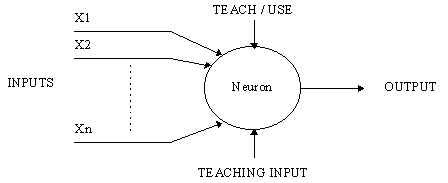
An artificial neuron is a device with  
>many inputs and 

>one output. 

The neuron has two modes of operation;  
>the training mode and 

>the using mode.
 
In the training mode, the neuron can be trained to fire (or not), for particular input patterns.
 
In the using mode, when a taught input pattern is detected at the input, its associated output becomes the current output. 

If the input pattern does not belong in the taught list of input patterns, the firing rule is used to determine whether to fire or not.


#### 2.Multi-layer perceptron :
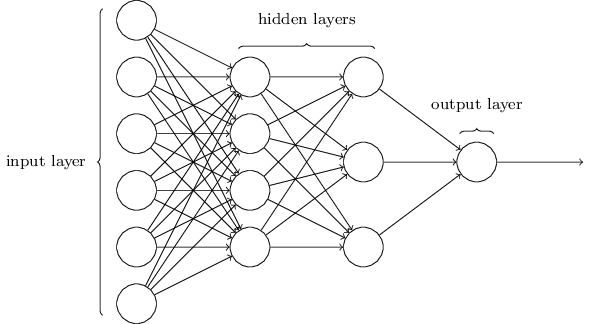

Multi layer perceptron (MLP) is a supplement of feed forward neural network. It consists of three types of layers—the input layer, output layer and hidden layer, as shown . The input layer receives the input signal to be processed. The required task such as prediction and classification is performed by the output layer. An arbitrary number of hidden layers that are placed in between the input and output layer are the true computational engine of the MLP. Similar to a feed forward network in a MLP the data flows in the forward direction from input to output layer. The neurons in the MLP are trained with the back propagation learning algorithm. MLPs are designed to approximate any continuous function and can solve problems which are not linearly separable. The major use cases of MLP are pattern classification, recognition, prediction and approximation.

#### 3. Deep learning :
>Deep learning is a subset of machine learning, which is essentially a neural network with three or more layers. These neural networks attempt to simulate the behavior of the human brain—albeit far from matching its ability—allowing it to “learn” from large amounts of data. While a neural network with a single layer can still make approximate predictions, additional hidden layers can help to optimize and refine for accuracy.

>Deep learning drives many artificial intelligence (AI) applications and services that improve automation, performing analytical and physical tasks without human intervention. Deep learning technology lies behind everyday products and services (such as digital assistants, voice-enabled TV remotes, and credit card fraud detection) as well as emerging technologies (such as self-driving cars).

#### Learning rate:
>	The choice of   is a tricky task in BPN algorithm

>The range of learning coefficients that will produce rapid training depends on the number of and types of input patterns.

Eaton and Olivers’ (1992) formula.
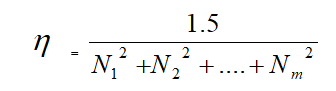
where, Ni is the number of patterns of type i and m is the number of different pattern types(It may be the difficult to spot similar patterns).

$\eta$ cannot be negative because this would cause the change of weight vector to move away from ideal vector position.

> If $\eta$   = 0 then no learning takes place.

> If $\eta$  = 2 then this network is unstable.

> If  $\eta$ >1 this weight vector will overshoot from its ideal position and oscillate.

> If  $\eta$  is very small(say   < 0.2) the weights are changed in small increments, this causing the system to converge more slowly.

>Better range is (0,1) 


### 11.	Write the difference between:-

>1.	Activation function vs threshold function

>2.	Step function vs sigmoid function

>3.	Single layer vs multi-layer perceptron

#### 1. Activation function vs threshold function
#### Activation Function :
>The activation function is a non-linear transformation that we do over the input before sending it to the next layer of neurons or finalizing it as output. Types of Activation Functions – Several different types of activation functions are used in Deep Learning.

Different Activation Functions are:
> Step Function , Sigmoid Function , ReLU , Leaky ReLU , Swish
 


#### Threshold Activation Function (Binary Step Function) or Heaviside Function
>Binary step function is a threshold-based activation function which means after a certain threshold neuron is activated and below the said threshold neuron is deactivated. In the above graph, the threshold is zero.

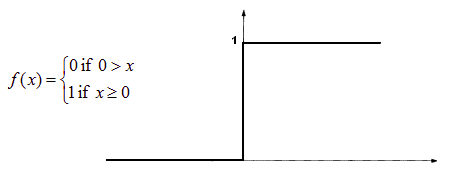

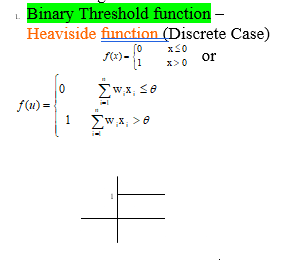

#### 2. Step function vs sigmoid function


#### Threshold Activation Function (Binary Step Function) or Heaviside Function
>Binary step function is a threshold-based activation function which means after a certain threshold neuron is activated and below the said threshold neuron is deactivated. In the above graph, the threshold is zero.

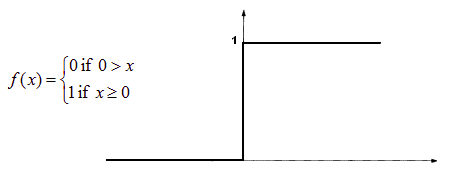

####   Sigmod function



The function formula and chart are as follows

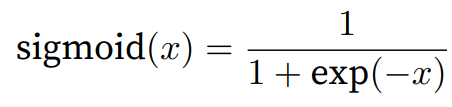


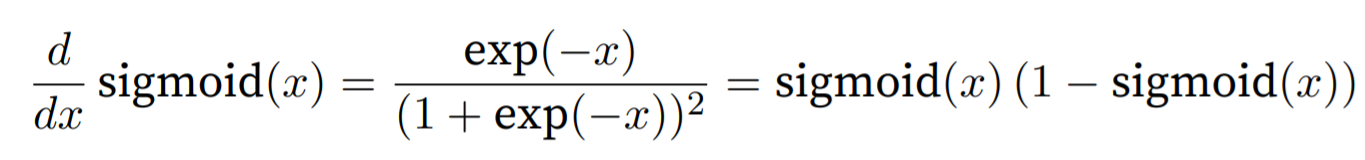

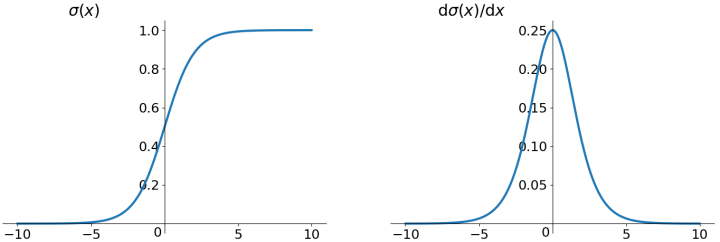

The Sigmoid function is the most frequently used activation function in the beginning of deep learning. It is a smoothing function that is easy to derive.

In the sigmoid function, we can see that its output is in the open interval (0,1). We can think of probability, but in the strict sense, don't treat it as probability. The sigmoid function was once more popular. It can be thought of as the firing rate of a neuron. In the middle where the slope is relatively large, it is the sensitive area of the neuron. On the sides where the slope is very gentle, it is the neuron's inhibitory area.

The function itself has certain defects.

1) When the input is slightly away from the coordinate origin, the gradient of the function becomes very small, almost zero. In the process of neural network backpropagation, we all use the chain rule of differential to calculate the differential of each weight w. When the backpropagation passes through the sigmod function, the differential on this chain is very small. Moreover, it may pass through many sigmod functions, which will eventually cause the weight w to have little effect on the loss function, which is not conducive to the optimization of the weight. This The problem is called gradient saturation or gradient dispersion.

2) The function output is not centered on 0, which will reduce the efficiency of weight update.

3) The sigmod function performs exponential operations, which is slower for computers.


Advantages of Sigmoid Function : -

1. Smooth gradient, preventing “jumps” in output values.
2. Output values bound between 0 and 1, normalizing the output of each neuron.
3. Clear predictions, i.e very close to 1 or 0.


Sigmoid has three major disadvantages:
* Prone to gradient vanishing
* Function output is not zero-centered
* Power operations are relatively time consuming


#### 3. Single layer vs multi-layer perceptron 

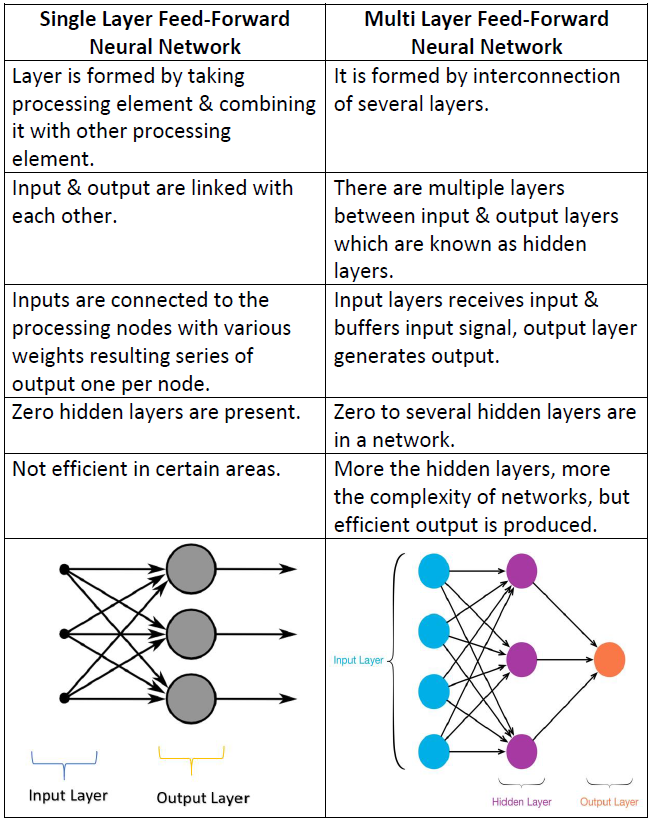